# Seed-averaged results (20260103)

This notebook aggregates multiple seeds and visualizes mean/variance across runs.


In [46]:
import os
import re
import glob
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import math


In [47]:
# Friendly labels for legend

def friendly_label(name: str) -> str:
    if "adaptive_epochnorm" in name:
        return "proposed (adaptive)"
    if "fixed_r1" in name:
        return "rank=1"
    if "fixed_r2" in name:
        return "rank=2"
    if "fixed_r4" in name:
        return "rank=4"
    if "fixed_r8" in name:
        return "rank=8"
    return name


# Consistent colors across plots
COLOR_MAP = {
    "adaptive": "#1f77b4",  # blue
    "fixed_r1": "#ff7f0e",  # orange
    "fixed_r2": "#2ca02c",  # green
    "fixed_r4": "#d62728",  # red
    "fixed_r8": "#9467bd",  # purple
}

def color_for(base_name: str) -> str:
    if "adaptive" in base_name:
        return COLOR_MAP["adaptive"]
    if "fixed_r1" in base_name:
        return COLOR_MAP["fixed_r1"]
    if "fixed_r2" in base_name:
        return COLOR_MAP["fixed_r2"]
    if "fixed_r4" in base_name:
        return COLOR_MAP["fixed_r4"]
    if "fixed_r8" in base_name:
        return COLOR_MAP["fixed_r8"]
    return "#333333"


In [ ]:
# Result roots (edit here)
RESULT_SPECS = {
    "nolimit": [
        "/workspace/results/20260103",
        "/home/hamano/master-thesis/results/20260103",
    ],
    "100mbps": [
        "/workspace/results/20260103_100mbps",
        "/home/hamano/master-thesis/results/20260103_100mbps",
    ],
    "200mbps": [
        "/workspace/results/20260103_200mbps",
        "/home/hamano/master-thesis/results/20260103_200mbps",
    ],
    "400mbps": [
        "/workspace/results/20260103_400mbps",
        "/home/hamano/master-thesis/results/20260103_400mbps",
    ],
}

# Select which result sets to visualize
ACTIVE_RESULT_KEYS = ["nolimit", "100mbps", "200mbps"]

RESULT_ROOTS = {}
missing = []
for key, candidates in RESULT_SPECS.items():
    if key not in ACTIVE_RESULT_KEYS:
        continue
    for p in candidates:
        if os.path.exists(p):
            RESULT_ROOTS[key] = p
            break
    if key not in RESULT_ROOTS:
        missing.append(key)

if missing:
    raise FileNotFoundError(f"No results dir found for: {missing}")

print("RESULT_ROOTS=", RESULT_ROOTS)


RESULT_ROOTS= {'nolimit': '/home/hamano/master-thesis/results/20260103', '100mbps': '/home/hamano/master-thesis/results/20260103_100mbps'}


In [49]:
# Discover accuracy files (prefer accuracy_results_copy.csv)
rows = []
for label, root in RESULT_ROOTS.items():
    acc_files = sorted(glob.glob(os.path.join(root, "*", "accuracy", "accuracy_results.csv")))
    print(label, "found accuracy files:", len(acc_files))

    for f in acc_files:
        exp_name = Path(f).parents[1].name  # .../exp_name/accuracy/accuracy_results.csv
        m = re.search(r"_seed(\d+)$", exp_name)
        seed = int(m.group(1)) if m else 42
        base = re.sub(r"_seed\d+$", "", exp_name)

        copy_path = os.path.join(Path(f).parent, "accuracy_results_copy.csv")
        use_path = copy_path if os.path.exists(copy_path) else f

        rows.append({
            "root_label": label,
            "exp_name": exp_name,
            "base_name": base,
            "seed": seed,
            "acc_csv": use_path,
        })

exp_df = pd.DataFrame(rows)
exp_df


nolimit found accuracy files: 15
100mbps found accuracy files: 15


,root_label,exp_name,base_name,seed,acc_csv
0,nolimit,exp_p1_powerSGD_adaptive_epochnorm_nolimit,exp_p1_powerSGD_adaptive_epochnorm_nolimit,NaN,/home/hamano/master-thesis/results/20260103/ex...
1,nolimit,exp_p1_powerSGD_adaptive_epochnorm_nolimit_seed0,exp_p1_powerSGD_adaptive_epochnorm_nolimit,0.0,/home/hamano/master-thesis/results/20260103/ex...
2,nolimit,exp_p1_powerSGD_adaptive_epochnorm_nolimit_seed1,exp_p1_powerSGD_adaptive_epochnorm_nolimit,1.0,/home/hamano/master-thesis/results/20260103/ex...
3,nolimit,exp_p1_powerSGD_fixed_r1_nolimit,exp_p1_powerSGD_fixed_r1_nolimit,NaN,/home/hamano/master-thesis/results/20260103/ex...
4,nolimit,exp_p1_powerSGD_fixed_r1_nolimit_seed0,exp_p1_powerSGD_fixed_r1_nolimit,0.0,/home/hamano/master-thesis/results/20260103/ex...
5,nolimit,exp_p1_powerSGD_fixed_r1_nolimit_seed1,exp_p1_powerSGD_fixed_r1_nolimit,1.0,/home/hamano/master-thesis/results/20260103/ex...
6,nolimit,exp_p1_powerSGD_fixed_r2_nolimit,exp_p1_powerSGD_fixed_r2_nolimit,NaN,/home/hamano/master-thesis/results/20260103/ex...
7,nolimit,exp_p1_powerSGD_fixed_r2_nolimit_seed0,exp_p1_powerSGD_fixed_r2_nolimit,0.0,/home/hamano/master-thesis/results/20260103/ex...
8,nolimit,exp_p1_powerSGD_fixed_r2_nolimit_seed1,exp_p1_powerSGD_fixed_r2_nolimit,1.0,/home/hamano/master-thesis/results/20260103/ex...
9,nolimit,exp_p1_powerSGD_fixed_r4_nolimit,exp_p1_powerSGD_fixed_r4_nolimit,NaN,/home/hamano/master-thesis/results/20260103/ex...


In [50]:
# Load accuracy data

def _infer_total_time_seconds(df: pd.DataFrame, epoch_max: int) -> float:
    d = df.copy().sort_values("epoch")
    d = d[d["epoch"] < epoch_max]
    if len(d) == 0:
        raise ValueError("No rows within epoch range.")

    t = d["elapsed_time"].astype(float).to_numpy()
    is_monotonic = np.all(np.diff(t) >= -1e-9)
    if is_monotonic:
        return float(t[-1])
    return float(np.sum(t))


def load_accuracy_df(csv_path: str) -> pd.DataFrame:
    df = pd.read_csv(csv_path)
    df = df.copy()
    df["epoch"] = df["epoch"].astype(int)
    return df


def to_cumulative_time(df: pd.DataFrame) -> pd.DataFrame:
    d = df.copy().sort_values("epoch")
    t = d["elapsed_time"].astype(float)
    if (t.diff().fillna(0) < 0).any() or (t.iloc[-1] < t.iloc[0]):
        t = t.cumsum()
    d["time_s"] = t
    return d


# Load all
runs = []
for _, r in exp_df.iterrows():
    df = load_accuracy_df(r["acc_csv"])
    runs.append({
        "root_label": r["root_label"],
        "exp_name": r["exp_name"],
        "base_name": r["base_name"],
        "seed": r["seed"],
        "df": df,
    })

print("runs:", len(runs))


runs: 30


In [51]:
# Align epochs across seeds and compute mean/std per base_name

def aggregate_by_base(runs_subset):
    out = {}
    for r in runs_subset:
        base = r["base_name"]
        d = r["df"]
        out.setdefault(base, []).append(d)

    agg = {}
    for base, dfs in out.items():
        # inner-join by epoch for common range
        merged = None
        for i, d in enumerate(dfs):
            d_ = d[["epoch", "accuracy", "elapsed_time"]].copy()
            d_.columns = ["epoch", f"acc_{i}", f"time_{i}"]
            merged = d_ if merged is None else pd.merge(merged, d_, on="epoch", how="inner")
        if merged is None or merged.empty:
            continue

        acc_cols = [c for c in merged.columns if c.startswith("acc_")]
        time_cols = [c for c in merged.columns if c.startswith("time_")]

        merged["acc_mean"] = merged[acc_cols].mean(axis=1)
        merged["acc_std"] = merged[acc_cols].std(axis=1)
        merged["time_mean"] = merged[time_cols].mean(axis=1)
        merged["time_std"] = merged[time_cols].std(axis=1)

        agg[base] = merged

    return agg

agg_by_label = {}
for label in RESULT_ROOTS.keys():
    runs_label = [r for r in runs if r["root_label"] == label]
    agg_by_label[label] = aggregate_by_base(runs_label)

{label: list(agg.keys()) for label, agg in agg_by_label.items()}


{'nolimit': ['exp_p1_powerSGD_adaptive_epochnorm_nolimit',
  'exp_p1_powerSGD_fixed_r1_nolimit',
  'exp_p1_powerSGD_fixed_r2_nolimit',
  'exp_p1_powerSGD_fixed_r4_nolimit',
  'exp_p1_powerSGD_fixed_r8_nolimit'],
 '100mbps': ['exp_p1_powerSGD_adaptive_epochnorm_nolimit',
  'exp_p1_powerSGD_fixed_r1_nolimit',
  'exp_p1_powerSGD_fixed_r2_nolimit',
  'exp_p1_powerSGD_fixed_r4_nolimit',
  'exp_p1_powerSGD_fixed_r8_nolimit']}

In [52]:
# Summary per base: mean max accuracy and mean speed (epoch/s)
BATCH_SIZE = 128

summary_by_label = {}
for label in RESULT_ROOTS.keys():
    runs_label = [r for r in runs if r["root_label"] == label]
    summary_rows = []
    for r in runs_label:
        df = r["df"]
        epoch_max = int(df["epoch"].max() + 1)
        max_acc = float(df["accuracy"].max())
        total_time = _infer_total_time_seconds(df, epoch_max)
        avg_epoch_time = total_time / float(epoch_max)
        speed = 1.0 / avg_epoch_time
        samples_per_epoch = float(df["num_data_processed"].max())
        iters_per_epoch = max(1, int(round(samples_per_epoch / BATCH_SIZE)))
        iter_time = total_time / float(epoch_max * iters_per_epoch)
        iter_per_s = 1.0 / iter_time if iter_time > 0 else 0.0
        summary_rows.append({
            "base_name": r["base_name"],
            "seed": r["seed"],
            "max_accuracy": max_acc,
            "speed_epoch_per_s": speed,
            "iter_time_s": iter_time,
            "iter_per_s": iter_per_s,
        })

    summary_df = pd.DataFrame(summary_rows)
    if summary_df.empty or "base_name" not in summary_df.columns:
        raise ValueError(f"No summary data found for label={label}.")

    summary_mean = summary_df.groupby("base_name").agg(
        max_accuracy_mean=("max_accuracy", "mean"),
        max_accuracy_std=("max_accuracy", "std"),
        speed_mean=("speed_epoch_per_s", "mean"),
        speed_std=("speed_epoch_per_s", "std"),
        iter_time_mean=("iter_time_s", "mean"),
        iter_time_std=("iter_time_s", "std"),
        iter_per_s_mean=("iter_per_s", "mean"),
        iter_per_s_std=("iter_per_s", "std"),
        seeds=("seed", "count"),
    ).reset_index()

    summary_by_label[label] = summary_mean

summary_by_label


{'nolimit':                                     base_name  max_accuracy_mean  \
 0  exp_p1_powerSGD_adaptive_epochnorm_nolimit          75.866667   
 1            exp_p1_powerSGD_fixed_r1_nolimit          74.930000   
 2            exp_p1_powerSGD_fixed_r2_nolimit          75.476667   
 3            exp_p1_powerSGD_fixed_r4_nolimit          75.673333   
 4            exp_p1_powerSGD_fixed_r8_nolimit          75.810000   
 
    max_accuracy_std  speed_mean  speed_std  iter_time_mean  iter_time_std  \
 0          0.046188    0.074241   0.000389        0.069076       0.000363   
 1          0.507445    0.083110   0.001483        0.061717       0.001095   
 2          0.174738    0.080455   0.001062        0.063747       0.000845   
 3          0.394250    0.074573   0.000513        0.068770       0.000475   
 4          0.268887    0.070547   0.000462        0.072694       0.000475   
 
    iter_per_s_mean  iter_per_s_std  seeds  
 0        14.476993        0.075877      2  
 1        16.

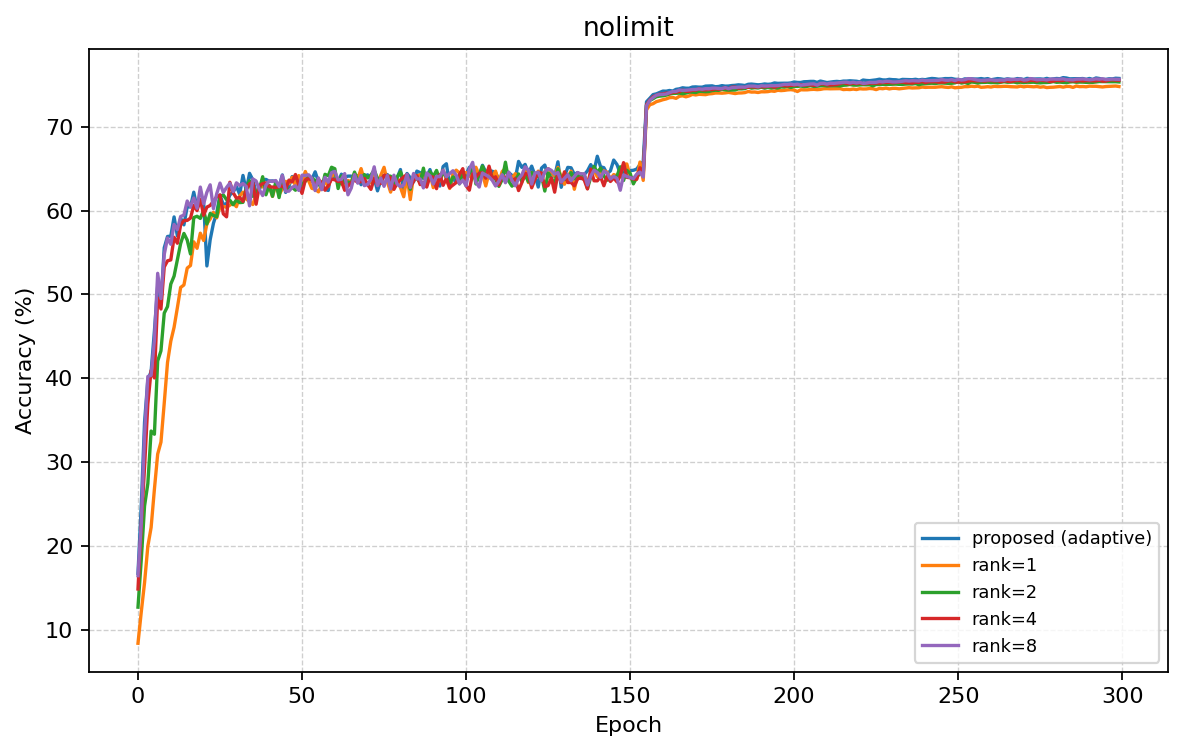

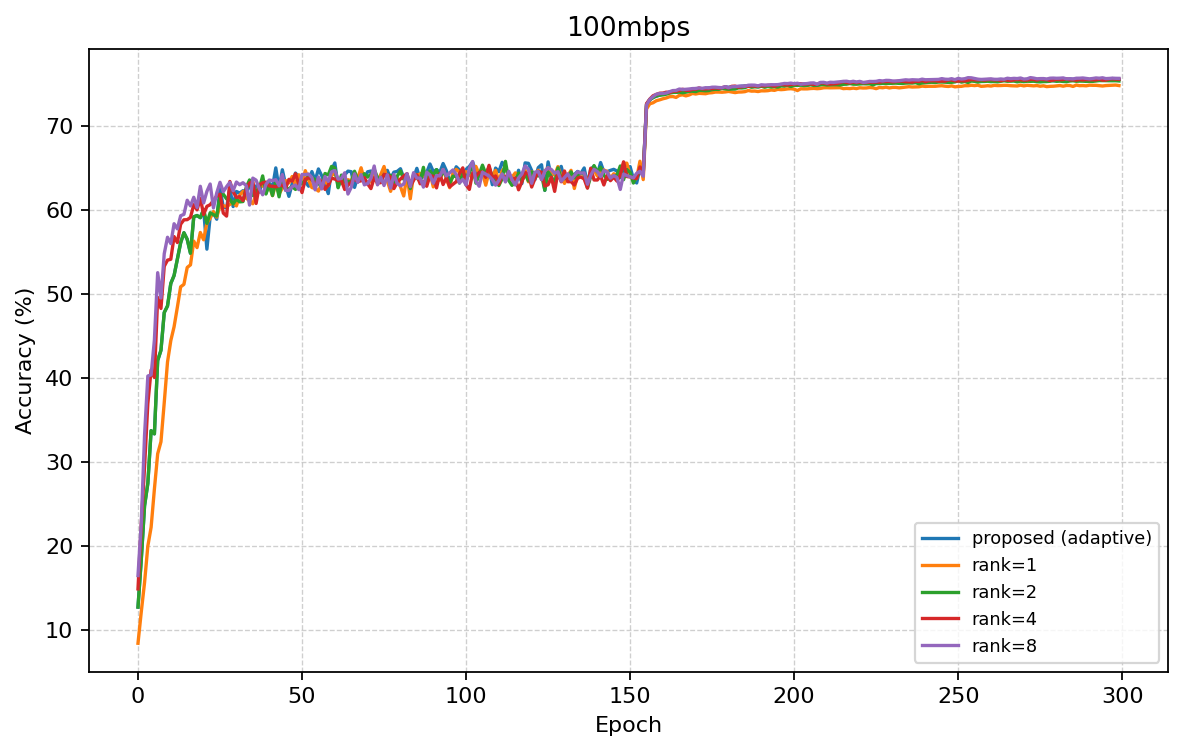

In [53]:
# Plot: mean accuracy vs epoch
for label, agg in agg_by_label.items():
    plt.figure(figsize=(7.5, 4.8), dpi=160)
    for base, d in agg.items():
        label_name = friendly_label(base)
        plt.plot(d["epoch"], d["acc_mean"], label=label_name, color=color_for(base))

    plt.title(label)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.grid(True, linestyle="--", linewidth=0.6, alpha=0.6)
    plt.legend(fontsize=8)
    plt.tight_layout()
    plt.show()


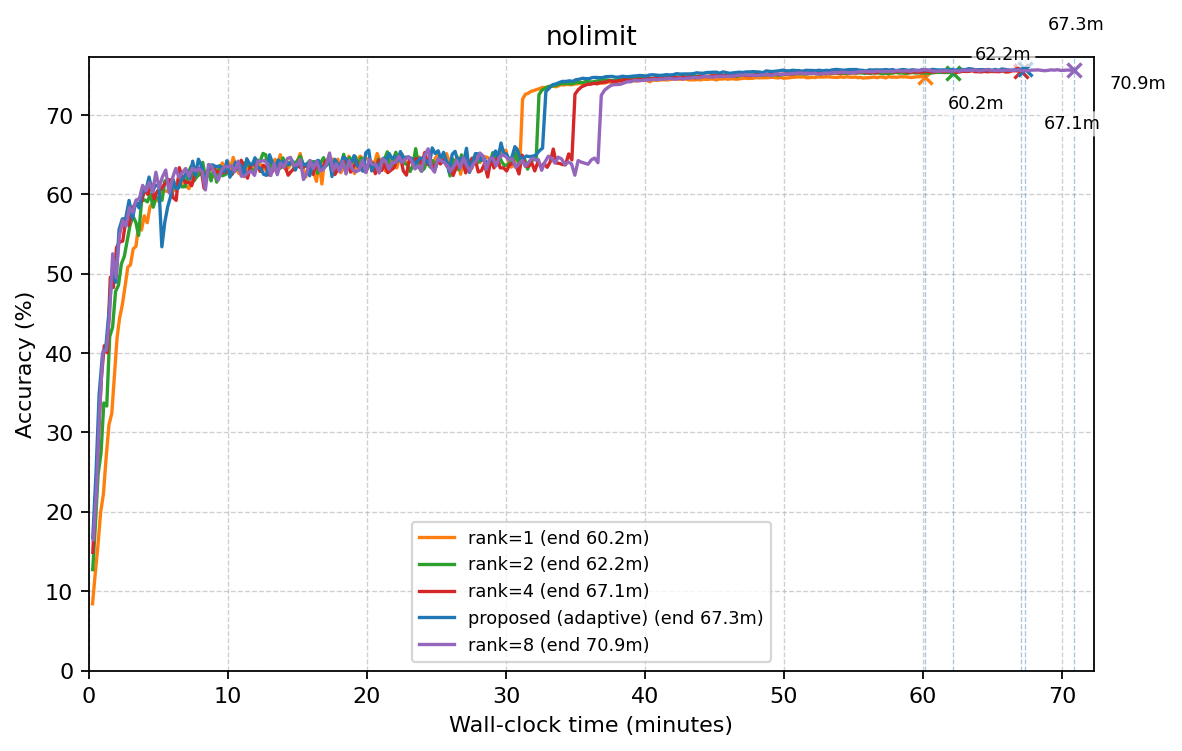

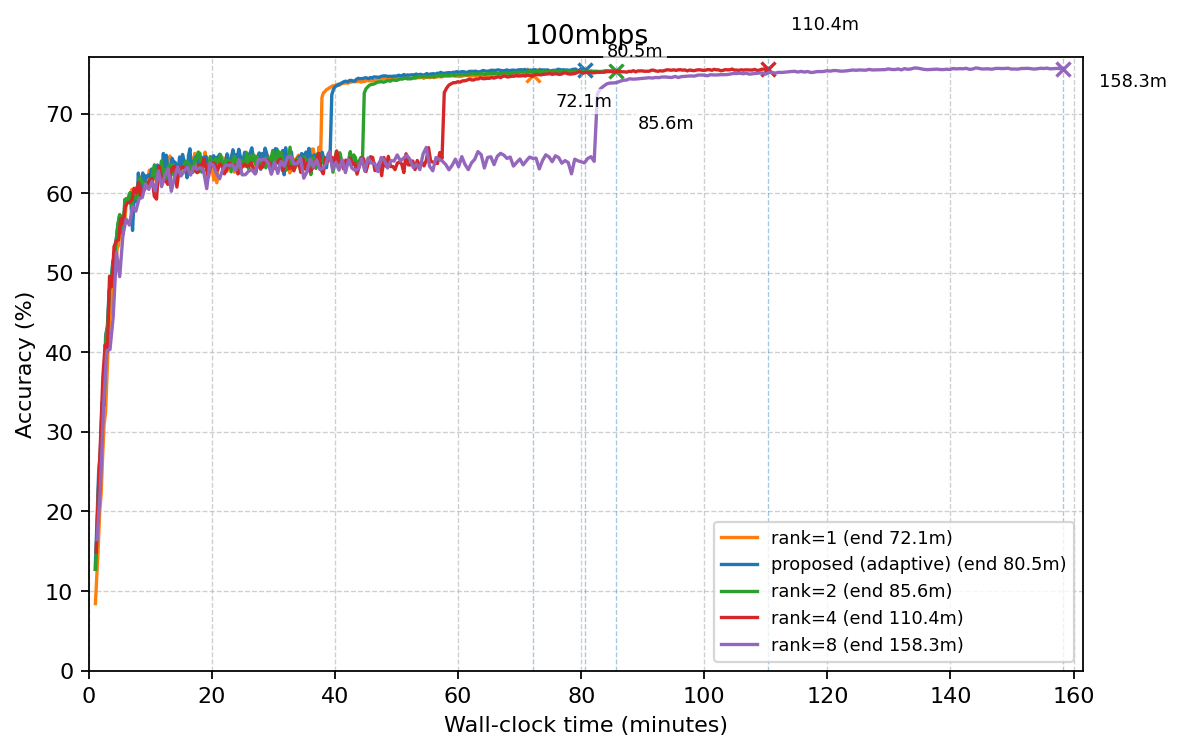

In [54]:
# Plot: mean accuracy vs time (minutes)
for label, agg in agg_by_label.items():
    plt.figure(figsize=(7.5, 4.8), dpi=160)

    bases = list(agg.keys())
    end_points = []
    max_t = 0.0
    max_a = 0.0
    for base in bases:
        d = agg[base]
        t_min = d["time_mean"] / 60.0
        end_t = float(t_min.iloc[-1])
        end_a = float(d["acc_mean"].iloc[-1])
        end_points.append((base, end_t, end_a))
        max_t = max(max_t, end_t)
        max_a = max(max_a, end_a)

    # sort by end time to stagger labels deterministically
    end_points.sort(key=lambda x: x[1])
    offsets = [
        (10, -14), (10, 6), (10, -26), (10, 18),
        (16, -8), (16, 10), (16, -20), (16, 26),
        (22, -12), (22, 14),
    ]

    for i, (base, end_t, end_a) in enumerate(end_points):
        d = agg[base]
        t_min = d["time_mean"] / 60.0
        label_name = f"{friendly_label(base)} (end {end_t:.1f}m)"

        plt.plot(t_min, d["acc_mean"], label=label_name, color=color_for(base))

        # mark end time with offset to avoid overlap
        dx, dy = offsets[i % len(offsets)]
        plt.scatter([end_t], [end_a], marker="x", s=40, color=color_for(base))
        plt.annotate(
            f"{end_t:.1f}m",
            (end_t, end_a),
            textcoords="offset points",
            xytext=(dx, dy),
            fontsize=8,
            bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.7, ec="none"),
        )
        plt.axvline(end_t, linestyle="--", linewidth=0.6, alpha=0.4)

    plt.title(label)
    plt.xlabel("Wall-clock time (minutes)")
    plt.ylabel("Accuracy (%)")
    plt.grid(True, linestyle="--", linewidth=0.6, alpha=0.6)
    plt.legend(fontsize=8)
    plt.xlim(0, max_t * 1.02)
    plt.ylim(0, max_a * 1.02)
    plt.tight_layout()
    plt.show()


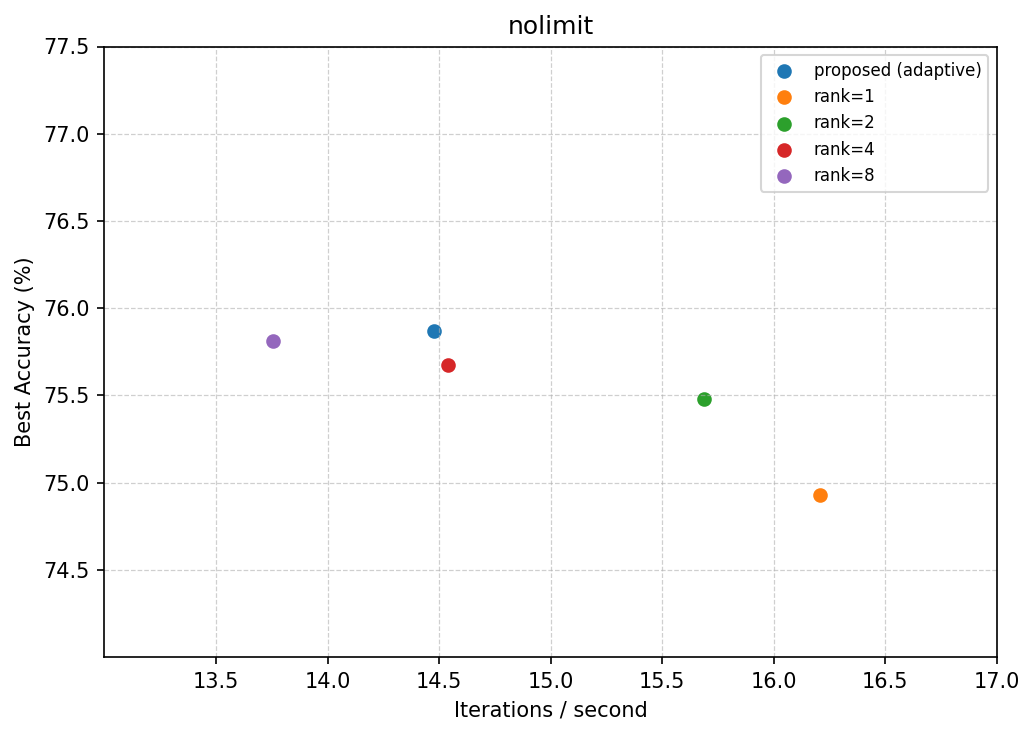

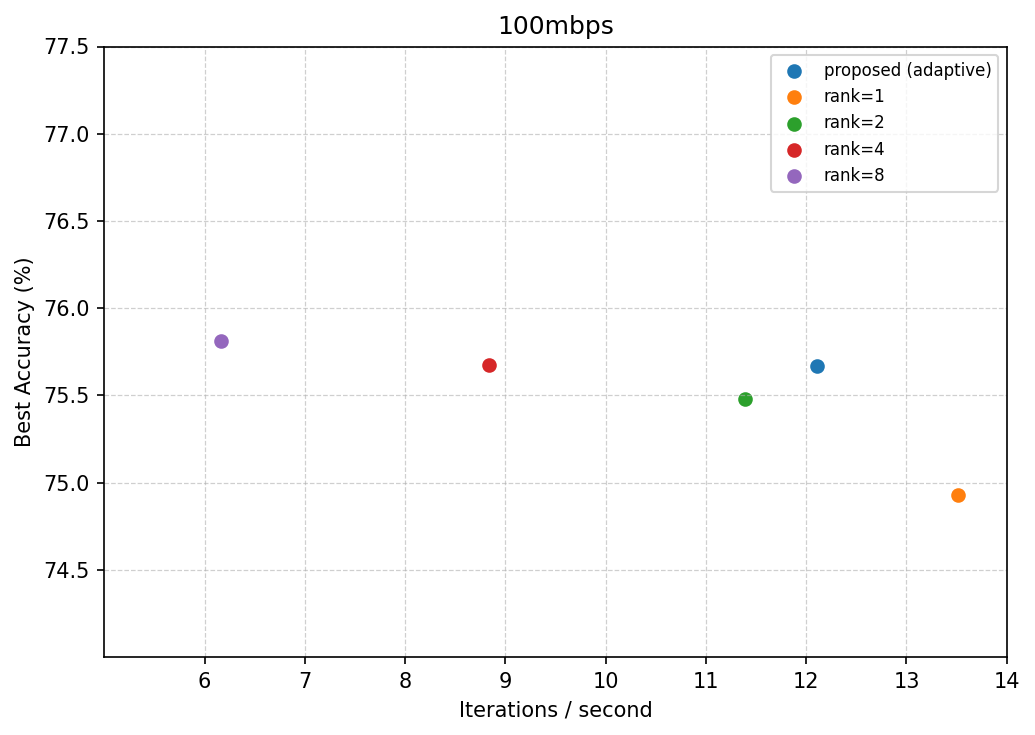

In [55]:
# Scatter: iterations per second vs max accuracy (mean across seeds) with error bars
for label, summary_mean in summary_by_label.items():
    fig, ax = plt.subplots(figsize=(7, 5), dpi=150)

    # plot each point with error bars
    for _, r in summary_mean.iterrows():
        ax.errorbar(
            r["iter_per_s_mean"],
            r["max_accuracy_mean"],
            xerr=r.get("iter_per_s_std", 0.0),
            yerr=r.get("max_accuracy_std", 0.0),
            fmt='o',
            color=color_for(r["base_name"]),
            ecolor=color_for(r["base_name"]),
            capsize=3,
            alpha=0.9,
        )

    # legend entries per base (unique)
    labels = []
    for _, r in summary_mean.iterrows():
        label_name = friendly_label(r["base_name"])
        if label_name in labels:
            continue
        ax.scatter([], [], color=color_for(r["base_name"]), label=label_name)
        labels.append(label_name)

    # auto-adjust x-axis start to a "nice" value
    x_min = float(summary_mean["iter_per_s_mean"].min())
    x_max = float(summary_mean["iter_per_s_mean"].max())
    x_start = max(0.0, math.floor(x_min - 0.5))
    ax.set_xlim(x_start, x_max * 1.02)

    # auto-adjust y-axis start: round down to 1.0
    y_min = float(summary_mean["max_accuracy_mean"].min())
    y_max = float(summary_mean["max_accuracy_mean"].max())
    y_start = math.floor(y_min / 1.0) * 1.0
    ax.set_ylim(y_start, y_max * 1.02)

    ax.set_title(label)
    ax.set_xlabel("Iterations / second")
    ax.set_ylabel("Best Accuracy (%)")
    ax.grid(True, linestyle="--", linewidth=0.6, alpha=0.6)
    ax.legend(fontsize=8)
    plt.tight_layout()
    plt.show()


## Summary table


In [ ]:
# Summary table with error ranges
summary_table = summary_mean.copy()
summary_table["accuracy_mean±std"] = summary_table.apply(
    lambda r: f"{r['max_accuracy_mean']:.2f} ± {r.get('max_accuracy_std', float('nan')):.2f}", axis=1
)
summary_table["speed_mean±std"] = summary_table.apply(
    lambda r: f"{r['speed_mean']:.4f} ± {r.get('speed_std', float('nan')):.4f}", axis=1
)

summary_table = summary_table[[
    "base_name",
    "accuracy_mean±std",
    "speed_mean±std",
    "seeds",
]].copy()
summary_table["label"] = summary_table["base_name"].map(friendly_label)
summary_table = summary_table[["label", "accuracy_mean±std", "speed_mean±std", "seeds"]]
summary_table


,config,best_accuracy_mean(%),speed(epoch/s),num_seeds
4,rank=8,75.810000,0.031550,2
3,rank=4,75.673333,0.045413,2
0,proposed (adaptive),75.666667,0.062061,2
2,rank=2,75.476667,0.058584,2
1,rank=1,74.930000,0.069677,2


## Rank changes over time (from benchmark CSV)


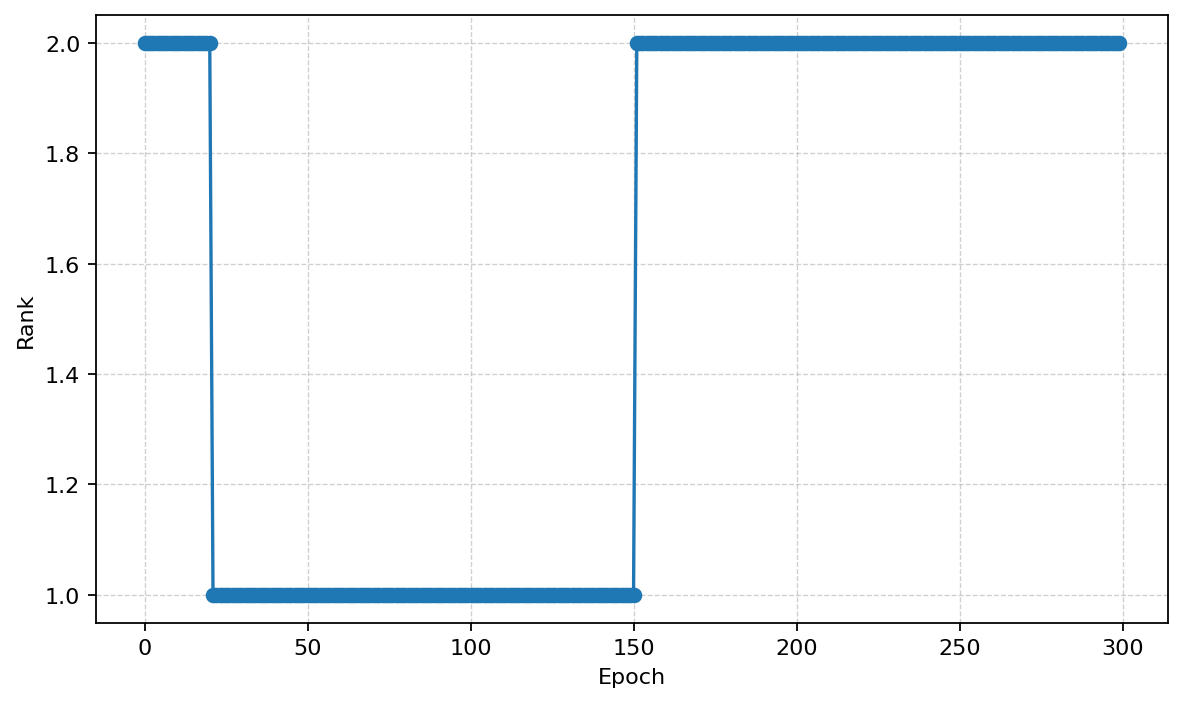

In [ ]:
# Rank changes over epoch (adaptive only) - average across seeds
for label, root in RESULT_ROOTS.items():
    bench_files = glob.glob(
        os.path.join(root, "*", "benchmark", "**", "csv", "powerSGD_benchmark_*.csv"),
        recursive=True
    )

    bench_rows = []
    for f in bench_files:
        exp_name = Path(f).parents[3].name
        base = re.sub(r"_seed\d+$", "", exp_name)
        m = re.search(r"_seed(\d+)$", exp_name)
        seed = int(m.group(1)) if m else 42
        bench_rows.append({
            "base_name": base,
            "exp_name": exp_name,
            "seed": seed,
            "bench_csv": f,
            "mtime": os.path.getmtime(f),
        })

    bench_df = pd.DataFrame(bench_rows)

    if not bench_df.empty:
        proposed = bench_df[bench_df["base_name"].str.contains("adaptive", na=False)]
        if not proposed.empty:
            # pick latest benchmark for each exp (seed)
            latest_per_exp = proposed.sort_values("mtime").groupby("exp_name").tail(1)

            rank_series = []
            grad_series = []

            for _, row in latest_per_exp.iterrows():
                df = pd.read_csv(row["bench_csv"])
                if "epoch" not in df.columns or "current_rank" not in df.columns:
                    continue
                df = df.sort_values(["epoch", "iteration"])
                rank_by_epoch = df.groupby("epoch")["current_rank"].last().reset_index()
                rank_by_epoch["seed"] = row["seed"]
                rank_series.append(rank_by_epoch)

                # grad change rate from accuracy_results.csv (not _copy)
                acc_csv = Path(row["bench_csv"]).parents[3] / "accuracy" / "accuracy_results.csv"
                if acc_csv.exists():
                    acc = pd.read_csv(acc_csv)
                    if "grad_accum_norm" in acc.columns:
                        g = acc[["epoch", "grad_accum_norm"]].dropna().copy()
                        if not g.empty:
                            g = g.sort_values("epoch")
                            g["prev_accum"] = g["grad_accum_norm"].shift(1)
                            g["grad_change_rate"] = (g["grad_accum_norm"] - g["prev_accum"]).abs() / g["prev_accum"]
                            g = g.dropna(subset=["grad_change_rate"])
                            if not g.empty:
                                g = g[["epoch", "grad_change_rate"]]
                                g["seed"] = row["seed"]
                                grad_series.append(g)

            if rank_series:
                rank_all = pd.concat(rank_series, ignore_index=True)
                rank_avg = rank_all.groupby("epoch")["current_rank"].mean().reset_index()
            else:
                rank_avg = pd.DataFrame()

            if grad_series:
                grad_all = pd.concat(grad_series, ignore_index=True)
                grad_avg = grad_all.groupby("epoch")["grad_change_rate"].mean().reset_index()
            else:
                grad_avg = pd.DataFrame()

            if not rank_avg.empty:
                plt.figure(figsize=(7.5, 4.5), dpi=160)
                ax = plt.gca()
                ax.plot(rank_avg["epoch"], rank_avg["current_rank"], marker="o", label="rank (mean)")

                if not grad_avg.empty:
                    ax2 = ax.twinx()
                    ax2.plot(
                        grad_avg["epoch"],
                        grad_avg["grad_change_rate"],
                        linestyle="--",
                        color="gray",
                        marker="o",
                        label="grad change rate (mean)",
                    )
                    ax2.set_ylabel("Grad change rate")

                    # combined legend
                    lines1, labels1 = ax.get_legend_handles_labels()
                    lines2, labels2 = ax2.get_legend_handles_labels()
                    ax.legend(lines1 + lines2, labels1 + labels2, fontsize=8, loc="upper left")
                else:
                    ax.legend(fontsize=8, loc="upper left")

                plt.title(label)
                ax.set_xlabel("Epoch")
                ax.set_ylabel("Rank")
                ax.grid(True, linestyle="--", linewidth=0.6, alpha=0.6)
                plt.tight_layout()
                plt.show()
            else:
                print(f"{label}: No adaptive benchmark CSV found for averaging.")
        else:
            print(f"{label}: No proposed (adaptive) benchmark CSV found.")
    else:
        print(f"{label}: No benchmark CSV found for rank visualization.")


In [ ]:
# Grad change rate only (adaptive only) - average across seeds
for label, root in RESULT_ROOTS.items():
    bench_files = glob.glob(
        os.path.join(root, "*", "benchmark", "**", "csv", "powerSGD_benchmark_*.csv"),
        recursive=True
    )

    bench_rows = []
    for f in bench_files:
        exp_name = Path(f).parents[3].name
        base = re.sub(r"_seed\d+$", "", exp_name)
        m = re.search(r"_seed(\d+)$", exp_name)
        seed = int(m.group(1)) if m else 42
        bench_rows.append({
            "base_name": base,
            "exp_name": exp_name,
            "seed": seed,
            "bench_csv": f,
            "mtime": os.path.getmtime(f),
        })

    bench_df = pd.DataFrame(bench_rows)

    if not bench_df.empty:
        proposed = bench_df[bench_df["base_name"].str.contains("adaptive", na=False)]
        if not proposed.empty:
            latest_per_exp = proposed.sort_values("mtime").groupby("exp_name").tail(1)

            grad_series = []
            for _, row in latest_per_exp.iterrows():
                acc_csv = Path(row["bench_csv"]).parents[3] / "accuracy" / "accuracy_results.csv"
                if acc_csv.exists():
                    acc = pd.read_csv(acc_csv)
                    if "grad_accum_norm" in acc.columns:
                        g = acc[["epoch", "grad_accum_norm"]].dropna().copy()
                        if not g.empty:
                            g = g.sort_values("epoch")
                            g["prev_accum"] = g["grad_accum_norm"].shift(1)
                            g["grad_change_rate"] = (g["grad_accum_norm"] - g["prev_accum"]).abs() / g["prev_accum"]
                            g = g.dropna(subset=["grad_change_rate"])
                            if not g.empty:
                                g = g[["epoch", "grad_change_rate"]]
                                g["seed"] = row["seed"]
                                grad_series.append(g)

            if grad_series:
                grad_all = pd.concat(grad_series, ignore_index=True)
                grad_avg = grad_all.groupby("epoch")["grad_change_rate"].mean().reset_index()

                plt.figure(figsize=(7.5, 4.5), dpi=160)
                plt.plot(
                    grad_avg["epoch"],
                    grad_avg["grad_change_rate"],
                    linestyle="--",
                    color="gray",
                    marker="o",
                    label="grad change rate (mean)",
                )
                plt.title(label)
                plt.xlabel("Epoch")
                plt.ylabel("Grad change rate")
                plt.grid(True, linestyle="--", linewidth=0.6, alpha=0.6)
                plt.legend(fontsize=8, loc="upper left")
                plt.tight_layout()
                plt.show()
            else:
                print(f"{label}: No adaptive grad change data found.")
        else:
            print(f"{label}: No proposed (adaptive) benchmark CSV found.")
    else:
        print(f"{label}: No benchmark CSV found for grad change visualization.")


## Time breakdown (compute vs communication/compression)


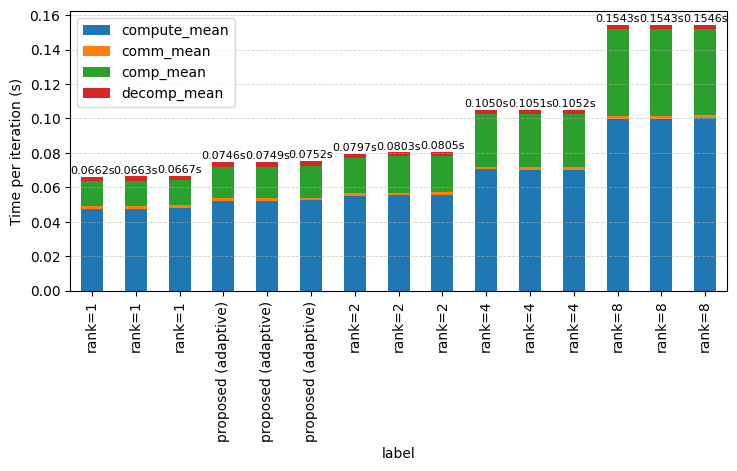

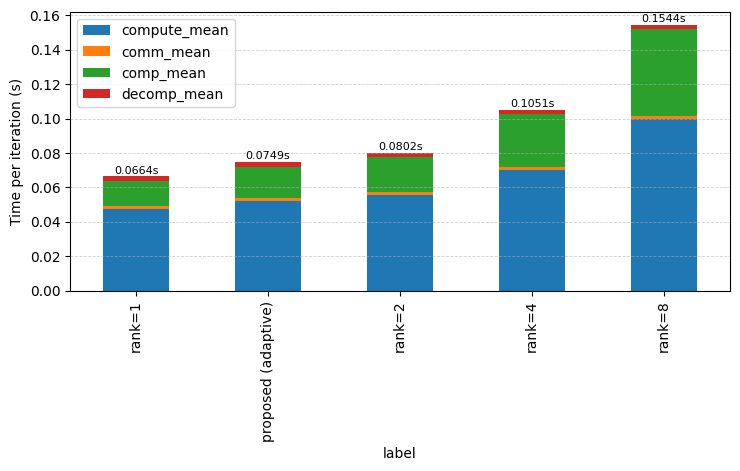

In [ ]:
# Time breakdown from benchmark CSV (mean across seeds per base_name)
for label, root in RESULT_ROOTS.items():
    bench_files = glob.glob(
        os.path.join(root, "*", "benchmark", "**", "csv", "powerSGD_benchmark_*.csv"),
        recursive=True
    )

    bench_rows = []
    for f in bench_files:
        exp_name = Path(f).parents[3].name
        base = re.sub(r"_seed\d+$", "", exp_name)
        bench_rows.append({
            "base_name": base,
            "exp_name": exp_name,
            "bench_csv": f,
            "mtime": os.path.getmtime(f),
        })

    bench_df = pd.DataFrame(bench_rows)

    if not bench_df.empty:
        rows = []
        latest_per_exp = bench_df.sort_values("mtime").groupby("exp_name").tail(1)

        for _, row in latest_per_exp.iterrows():
            base = row["base_name"]
            df = pd.read_csv(row["bench_csv"])
            if not {"compute_time", "communication_time", "compression_time", "decompression_time", "iteration_total_time"}.issubset(df.columns):
                continue
            rows.append({
                "base_name": base,
                "compute_mean": df["compute_time"].mean(),
                "comm_mean": df["communication_time"].mean(),
                "comp_mean": df["compression_time"].mean(),
                "decomp_mean": df["decompression_time"].mean(),
                "total_mean": df["iteration_total_time"].mean(),
            })

        breakdown_df = pd.DataFrame(rows)
        if not breakdown_df.empty:
            breakdown_df["label"] = breakdown_df["base_name"].map(friendly_label)

            breakdown_mean = (
                breakdown_df
                .groupby("label", as_index=False)
                .mean(numeric_only=True)
                .sort_values("total_mean")
                .set_index("label")
            )

            ax = breakdown_mean[["compute_mean", "comm_mean", "comp_mean", "decomp_mean"]].plot(
                kind="bar",
                stacked=True,
                figsize=(7.5, 4.8),
            )
            ax.set_ylabel("Time per iteration (s)")
            ax.grid(True, axis="y", linestyle="--", linewidth=0.6, alpha=0.6)
            ax.set_title(label)

            for i, (_, row) in enumerate(breakdown_mean.iterrows()):
                ax.text(
                    i,
                    row[["compute_mean", "comm_mean", "comp_mean", "decomp_mean"]].sum() + 0.0005,
                    f"{row['total_mean']:.4f}s",
                    ha="center",
                    va="bottom",
                    fontsize=8,
                )

            plt.tight_layout()
            plt.show()
        else:
            print(f"{label}: No benchmark CSV with time breakdown columns found.")
    else:
        print(f"{label}: No benchmark CSV found for time breakdown.")
